In [ ]:
import os

print("Current working directory:", os.getcwd())
print("Files in this directory:", os.listdir())

Current working directory: /Users/raidarasul/Desktop/tesla-eda
Files in this directory: ['.DS_Store', 'Untitled.ipynb', 'tesla_deliveries.csv', '.ipynb_checkpoints']


In [ ]:
# Core
import pandas as pd
import numpy as np

# Viz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Stats (optional)
from scipy import stats
import statsmodels.api as sm

# Utility
import os, glob, textwrap

# Pretty display
pd.set_option("display.max_columns", 100)
pd.set_option("display.float_format", "{:,.2f}".format)

# Inline plots
%matplotlib inline

In [ ]:
csv_path = "tesla_deliveries.csv"  

df = pd.read_csv(csv_path)

# Quick sanity checks
df.shape, df.columns
df.head()
df.tail()
df.info()
df.describe(include="all").T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  2640 non-null   int64  
 1   Month                 2640 non-null   int64  
 2   Region                2640 non-null   object 
 3   Model                 2640 non-null   object 
 4   Estimated_Deliveries  2640 non-null   int64  
 5   Production_Units      2640 non-null   int64  
 6   Avg_Price_USD         2640 non-null   float64
 7   Battery_Capacity_kWh  2640 non-null   int64  
 8   Range_km              2640 non-null   int64  
 9   CO2_Saved_tons        2640 non-null   float64
 10  Source_Type           2640 non-null   object 
 11  Charging_Stations     2640 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 247.6+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year,"2,640.00",NaN,NaN,NaN,"2,020.00",3.16,"2,015.00","2,017.00","2,020.00","2,023.00","2,025.00"
Month,"2,640.00",NaN,NaN,NaN,6.50,3.45,1.00,3.75,6.50,9.25,12.00
Region,2640,4,Europe,660,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,2640,5,Model S,528,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Estimated_Deliveries,"2,640.00",NaN,NaN,NaN,"9,922.20","3,935.95",48.00,"7,292.00","9,857.00","12,510.25","25,704.00"
Production_Units,"2,640.00",NaN,NaN,NaN,"10,655.85","4,260.60",50.00,"7,828.25","10,546.50","13,469.00","28,939.00"
Avg_Price_USD,"2,640.00",NaN,NaN,NaN,"84,907.34","20,123.26","50,003.70","67,726.36","85,058.51","102,373.04","119,965.36"
Battery_Capacity_kWh,"2,640.00",NaN,NaN,NaN,87.06,20.84,60.00,75.00,82.00,100.00,120.00
Range_km,"2,640.00",NaN,NaN,NaN,500.26,120.87,330.00,418.00,470.00,586.25,719.00
CO2_Saved_tons,"2,640.00",NaN,NaN,NaN,744.08,353.22,3.07,499.62,699.51,943.76,"2,548.55"


In [ ]:
print("Shape:", df.shape)
display(df.head())
display(df.tail())

df.info()
df.dtypes
df.nunique()
df.describe()
df.isna().sum()

Shape: (2640, 12)


,Year,Month,Region,Model,Estimated_Deliveries,Production_Units,Avg_Price_USD,Battery_Capacity_kWh,Range_km,CO2_Saved_tons,Source_Type,Charging_Stations
0,2023,5,Europe,Model S,17646,17922,"92,874.27",120,704,"1,863.42",Interpolated (Month),12207
1,2015,2,Asia,Model X,3797,4164,"62,205.65",75,438,249.46,Official (Quarter),7640
2,2019,1,North America,Model X,8411,9189,"117,887.32",82,480,605.59,Interpolated (Month),14071
3,2021,2,North America,Model 3,6555,7311,"89,294.91",120,712,700.07,Official (Quarter),9333
4,2016,12,Middle East,Model Y,12374,13537,"114,846.78",120,661,"1,226.88",Estimated (Region),8722


,Year,Month,Region,Model,Estimated_Deliveries,Production_Units,Avg_Price_USD,Battery_Capacity_kWh,Range_km,CO2_Saved_tons,Source_Type,Charging_Stations
2635,2021,10,Middle East,Model Y,13488,14333,"113,771.10",120,719,"1,454.68",Official (Quarter),4273
2636,2019,7,Middle East,Model S,18300,18407,"81,889.67",82,487,"1,336.81",Official (Quarter),9833
2637,2019,9,Asia,Model S,13291,14839,"97,139.38",100,580,"1,156.32",Estimated (Region),13709
2638,2020,5,Asia,Cybertruck,3471,3714,"69,990.57",60,358,186.39,Interpolated (Month),6754
2639,2018,8,North America,Model S,2639,2929,"51,676.24",82,474,187.63,Estimated (Region),14297


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  2640 non-null   int64  
 1   Month                 2640 non-null   int64  
 2   Region                2640 non-null   object 
 3   Model                 2640 non-null   object 
 4   Estimated_Deliveries  2640 non-null   int64  
 5   Production_Units      2640 non-null   int64  
 6   Avg_Price_USD         2640 non-null   float64
 7   Battery_Capacity_kWh  2640 non-null   int64  
 8   Range_km              2640 non-null   int64  
 9   CO2_Saved_tons        2640 non-null   float64
 10  Source_Type           2640 non-null   object 
 11  Charging_Stations     2640 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 247.6+ KB


Year                    0
Month                   0
Region                  0
Model                   0
Estimated_Deliveries    0
Production_Units        0
Avg_Price_USD           0
Battery_Capacity_kWh    0
Range_km                0
CO2_Saved_tons          0
Source_Type             0
Charging_Stations       0
dtype: int64

In [ ]:
# Drop exact duplicate rows
df = df.drop_duplicates()

# Drop irrelevant columns if any (safe no-op if absent)
df = df.drop(columns=["Unnamed: 0", "Notes", "Comments"], errors="ignore")

# Standardize column names (snake_case)
df.columns = (
    df.columns
      .str.strip()
      .str.replace(r"\s+", "_", regex=True)
      .str.replace("[()]", "", regex=True)
      .str.lower()
)

# Handle missing values (choose strategy: drop rows or impute)
# Example: fill numeric NAs with median; categorical with "Unknown"
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna("Unknown")

# Create a Date column if you have year + quarter or year + month
if set(["year", "quarter"]).issubset(df.columns):
    # Quarter like 1..4
    df["date"] = pd.PeriodIndex(year=df["year"].astype(int),
                                quarter=df["quarter"].astype(int)).to_timestamp()
elif set(["year", "month"]).issubset(df.columns):
    df["date"] = pd.to_datetime(df["year"].astype(int).astype(str) + "-" + df["month"].astype(int).astype(str) + "-01",
                                errors="coerce")

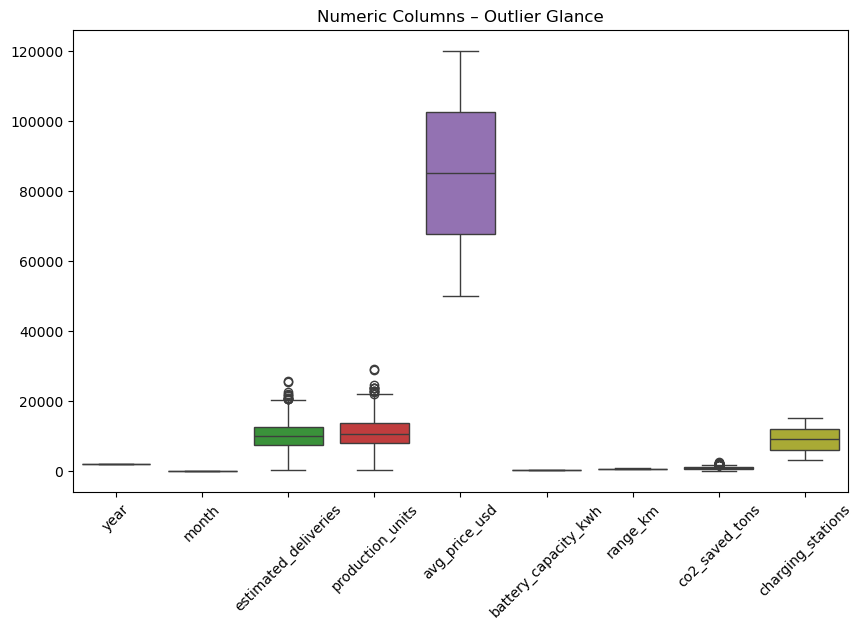

In [ ]:
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(10,6))
sns.boxplot(data=numeric_df)
plt.title("Numeric Columns – Outlier Glance")
plt.xticks(rotation=45)
plt.show()


model
Model S       528
Model X       528
Model 3       528
Model Y       528
Cybertruck    528
Name: count, dtype: int64

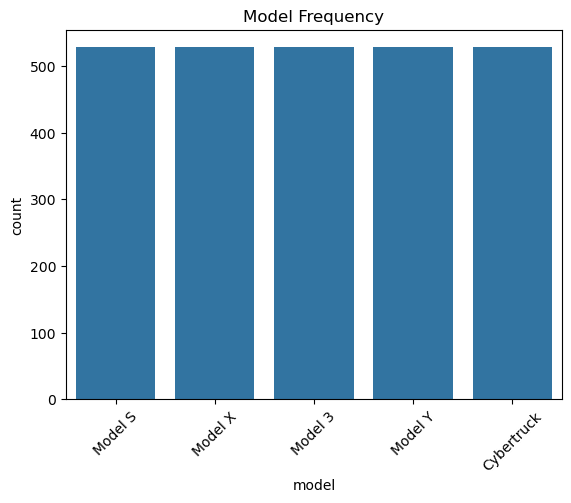

In [ ]:
# Categorical example (if 'model' exists)
if "model" in df.columns:
    display(df["model"].value_counts())
    sns.countplot(x="model", data=df)
    plt.xticks(rotation=45); plt.title("Model Frequency"); plt.show()

# Numerical example (deliveries/production)
for col in [c for c in ["deliveries","production"] if c in df.columns]:
    print(f"\n=== {col.upper()} ===")
    print("mean:", df[col].mean(), "median:", df[col].median(), "mode:", df[col].mode().tolist())
    print("variance:", df[col].var(), "skew:", df[col].skew(), "kurtosis:", df[col].kurt())

    sns.histplot(df[col], kde=True)
    plt.title(f"{col} distribution")
    plt.show()

    sns.boxplot(y=df[col])
    plt.title(f"{col} boxplot")
    plt.show()

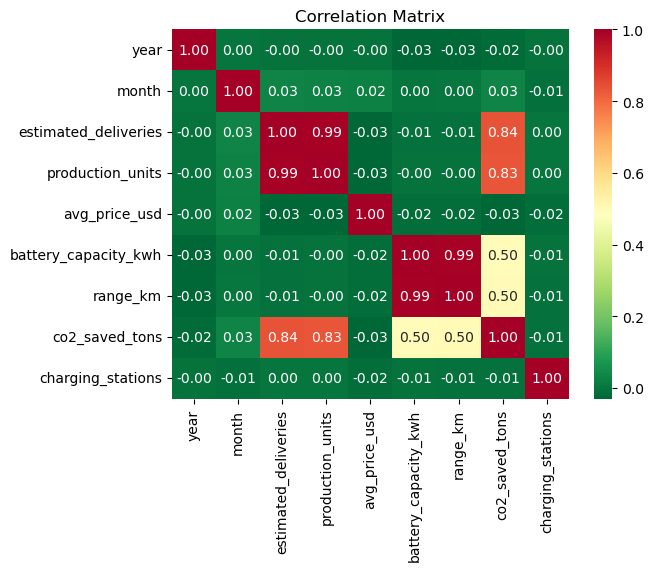

In [ ]:
# Correlation (numerical)
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdYlGn_r")
plt.title("Correlation Matrix")
plt.show()

# Production vs Deliveries (if both exist)
if {"production","deliveries"}.issubset(df.columns):
    sns.scatterplot(x="production", y="deliveries", data=df)
    plt.title("Production vs Deliveries")
    plt.show()

# Categorical vs numerical (e.g., model vs deliveries)
if {"model","deliveries"}.issubset(df.columns):
    sns.boxplot(x="model", y="deliveries", data=df)
    plt.xticks(rotation=45); plt.title("Deliveries by Model"); plt.show()

# Time series (date vs numerical)
if "date" in df.columns and "deliveries" in df.columns:
    df_sorted = df.sort_values("date")
    plt.plot(df_sorted["date"], df_sorted["deliveries"], marker="o")
    plt.title("Deliveries Over Time")
    plt.xlabel("Date"); plt.ylabel("Deliveries")
    plt.xticks(rotation=45); plt.tight_layout(); plt.show()


In [ ]:
!pip install skimpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 10.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 11.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 7.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 783.6/783.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.7/36.7 MB 7.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.2/34.2 MB 2.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 4.9 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.15.1
    Uninstalling Pygments-2.15.1:
      Successfully uninstalled Pygments-2.15.1
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 16.1.0
    Uninstalling pyarrow-16.1.0:
      Successfully uninstalled pyarrow-16.1.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26

In [ ]:
from skimpy import skim

# Run skim to summarize your DataFrame
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2640   │ │ int64       │ 7     │                                                          │
│ │ Number of columns │ 13     │ │ string      │ 3     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                │ datetime64  │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column                 ┃ NA  ┃ NA %  ┃ mean   ┃ sd     ┃ p0     ┃ p25   ┃ p50   ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ year                   │   0 │     0 │   2020 │  3.163 │   2015 │  2017 │  2020 │   2023 │   2025 │ ██▄███ │  │
│ │ month                  │   0 │     0 │    6.5 │  3.453 │      1 │  3.75 │   6.5 │   9.25 │     12 │ ██████ │  │
│ │ estimated_deliveries   │   0 │     0 │   9922 │   3936 │     48 │  7292 │  9857 │  12510 │  25700 │ ▂▆█▄▁  │  │
│ │ production_units       │   0 │     0 │  10660 │   4261 │     50 │  7828 │ 10550 │  13470 │  28940 │  ▂▇█▃  │  │
│ │ avg_price_usd          │   0 │     0 │  84910 │  20120 │  50000 │ 67730 │ 85060 │ 102400 │ 120000 │ ████▇█ │  │
│ │ battery_capacity_kwh   │   0 │     0 │  87.06 │  20.84 │     60 │    75 │    82 │    100 │    120 │ ███ ▇█ │  │
│ │ range_km               │   0 │     0 │  500.3 │  120.9 │    330 │   418 │   470 │  586.2 │    719 │ ▇█▅▅▁▇ │  │
│ │ co2_saved_tons         │   0 │     0 │  744.1 │  353.2 │   3.07 │ 499.6 │ 699.5 │  943.8 │   2549 │  ▃█▄▁  │  │
│ │ charging_stations      │   0 │     0 │   8932 │   3470 │   3002 │  5898 │  8902 │  11940 │  15000 │ ██▇█▇█ │  │
│ └────────────────────────┴─────┴───────┴────────┴────────┴────────┴───────┴───────┴────────┴────────┴────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column         ┃ NA     ┃ NA %       ┃ first                 ┃ last                  ┃ frequency           ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ date           │      0 │          0 │      2015-01-01       │      2025-12-01       │ None                │  │
│ └────────────────┴────────┴────────────┴───────────────────────┴───────────────────────┴─────────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃           ┃           ┃           ┃           ┃ chars per ┃ words per ┃ total      ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest  ┃ longest   ┃ min       ┃ max       ┃ row       ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━

In [ ]:
df.to_csv("cleaned_tesla_deliveries.csv", index=False)

In [ ]:
import os
os.listdir()

['.DS_Store',
 'tesla_deliveries.csv',
 'cleaned_tesla_deliveries.csv',
 '.ipynb_checkpoints',
 'tesla-eda.ipynb']